# Análisis Exploratorio de Datos (EDA) de Mortalidad por Asma.

El objetivo del Análisis Exploratorio de Datos (EDA) de mortalidad por asma es descubrir patrones, tendencias y asociaciones entre las variables que orienten la ejecución de la metodología para aceptar o rechazar nuestras hipótesis de investigación.

Nuestro EDA de mortalidad por asma comprende:

* Estadísticas descriptivas
* Análisis temporal
* Análisis demográfico
* Análisis geoespacial
* Detección de valores extremos

## Cargar librerías

Se cargarán las librerías necesarias para el análisis

In [ ]:
# dataframe libraries
import pandas as pd

# geospatial libraries
import geopandas as gpd
import pysal
import mapclassify

# numpy
import numpy as np

# plot libraries
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.express as px
from matplotlib.ticker import MaxNLocator

# picture libraries
from IPython.display import Image
import imageio.v2 as imageio

# other libraries
import os
from itables import init_notebook_mode

## Cargar el dataset

Se cargará el dataset resultate del preoprocesamiento.

In [ ]:
# caragar DataFrame (df)
df = pd.read_csv('pdt/mortalidad_asma/data/csv/def_asma_2001_2022_clean_02.csv')


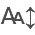

ANIO  IDDPTO  SEXO GRUPEDAD  CANTIDAD
0  2001    2000     2    45-64         1
1  2001    2000     2    >= 75         1
2  2001    2000     1    65-74         1
3  2001    2000     1    65-74         1
4  2001    2000     2    >= 75         1

In [ ]:
# visualizar df
init_notebook_mode(all_interactive=True)
df.head()

## Estadísticas descriptivas

En este EDA las estadísticas descriptivas no permitirán resumir y contextualizar sistemáticamente los datos de mortalidad por asma para descubrir información útil preliminar de su comportamiento temporal, demográfico y espacial.

### Tendencias temporales
A través del EDA de las tendencias temporales comprenderemos cómo evoluciona la mortalidad por asma a lo largo del tiempo para identificar patrones.

#### Total de defunciones por asma por año

In [ ]:
# dataframe con el numero de muertes por año
df_mpa = df.groupby('ANIO')['CANTIDAD'].sum().reset_index()



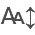

ANIO  CANTIDAD
0  2001       695
1  2002       638
2  2003       765
3  2004       650
4  2005       696

In [ ]:
# visualizar df
init_notebook_mode(all_interactive=True)
df_mpa.head()

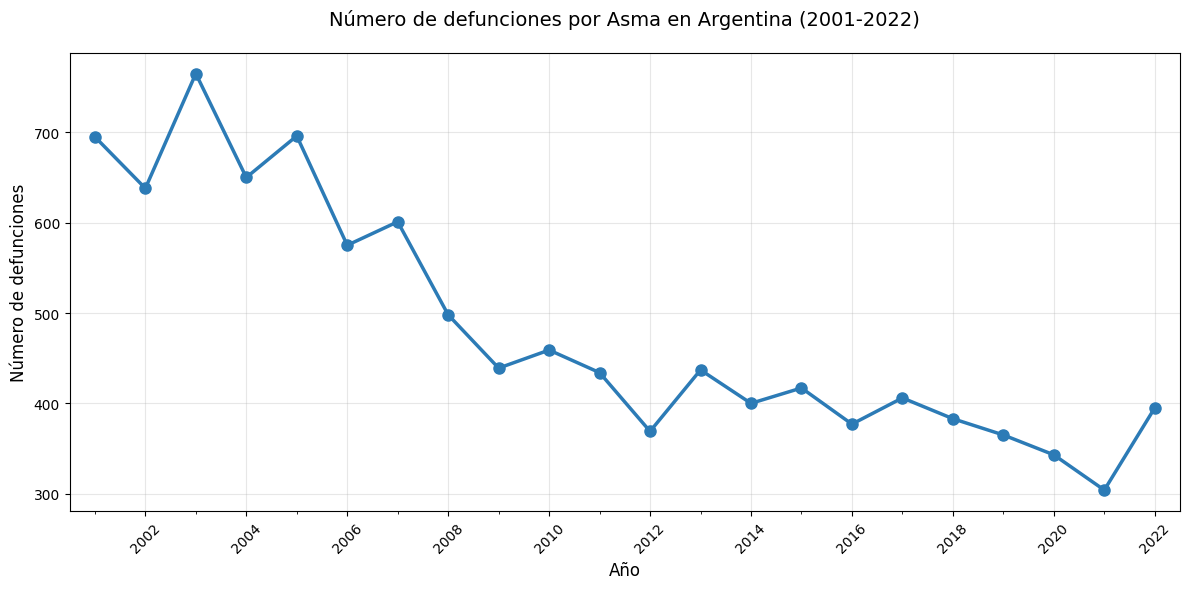

In [ ]:
# Create figure
plt.figure(figsize=(12, 6))

# Create line plot
plt.plot(df_mpa['ANIO'], df_mpa['CANTIDAD'],
         marker='o',
         linestyle='-',
         color='#2c7bb6',
         linewidth=2.5,
         markersize=8)

# Formatting
plt.title('Número de defunciones por Asma en Argentina (2001-2022)', fontsize=14, pad=20)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Número de defunciones', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(df_mpa['ANIO'][::2], rotation=45)  # Show every other year
plt.xlim(2000.5, 2022.5)  # Add buffer on x-axis

# Improve tick formatting
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(2))
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))

plt.tight_layout()
plt.show();

#### Número de defunciones estratificadas por sexo y grupo de edad

In [ ]:
# cargar df
df = pd.read_csv('pdt/mortalidad_asma/data/csv/def_asma_2001_2022_clean_02.csv')


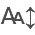

ANIO  IDDPTO  SEXO GRUPEDAD  CANTIDAD
0  2001    2000     2    45-64         1
1  2001    2000     2    >= 75         1
2  2001    2000     1    65-74         1
3  2001    2000     1    65-74         1
4  2001    2000     2    >= 75         1

In [ ]:
# visualizar df
init_notebook_mode(all_interactive=True)
df.head()

In [ ]:
# renombrar valore de SEXO
sex_map = {1: 'Masculino', 2: 'Femenino', 9: "Otro"}
df['SEXO'] = df['SEXO'].map(sex_map)


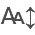

ANIO  IDDPTO       SEXO GRUPEDAD  CANTIDAD
0  2001    2000   Femenino    45-64         1
1  2001    2000   Femenino    >= 75         1
2  2001    2000  Masculino    65-74         1
3  2001    2000  Masculino    65-74         1
4  2001    2000   Femenino    >= 75         1

In [ ]:
# visualizar df
init_notebook_mode(all_interactive=True)
df.head()

In [ ]:
# Orden personalizado de los grupos de edad
age_order = ['0-4', '5-19', '20-44', '45-64', '65-74', '>= 75', 'sin especificar']

In [ ]:
# Aplicar orden como categoría
df['GRUPEDAD'] = pd.Categorical(df['GRUPEDAD'], categories=age_order, ordered=True)


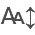

ANIO  IDDPTO       SEXO GRUPEDAD  CANTIDAD
0  2001    2000   Femenino    45-64         1
1  2001    2000   Femenino    >= 75         1
2  2001    2000  Masculino    65-74         1
3  2001    2000  Masculino    65-74         1
4  2001    2000   Femenino    >= 75         1

In [ ]:
# visualizar df
init_notebook_mode(all_interactive=True)
df.head()

In [ ]:
# Aggregate the data by GRUPEDAD, SEXO, and ANIO, summing CANTIDAD
df_agg = df.groupby(['GRUPEDAD', 'SEXO', 'ANIO'], as_index=False, observed=True)['CANTIDAD'].sum()


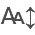

GRUPEDAD      SEXO  ANIO  CANTIDAD
0      0-4  Femenino  2001         1
1      0-4  Femenino  2002         3
2      0-4  Femenino  2003         2
3      0-4  Femenino  2004         1
4      0-4  Femenino  2006         1

In [ ]:
# visualizar df
init_notebook_mode(all_interactive=True)
df_agg.head()

Se creará gráficos de líneas que muestren defunciones anuales por asma según sexo y grupo etario (2001–2022)

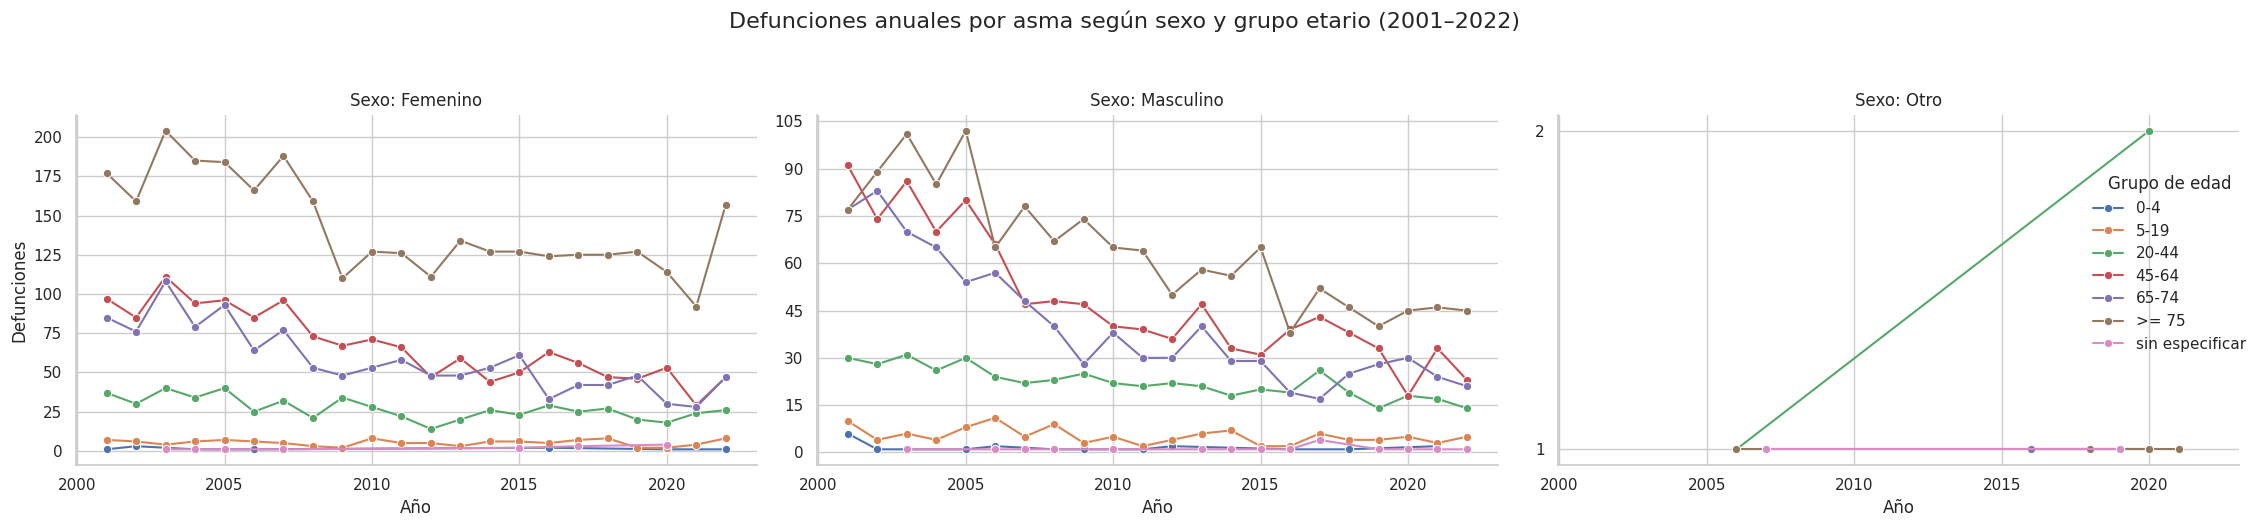

In [ ]:
# Set style
sns.set(style="whitegrid")

# Create the FacetGrid: one plot per sex
g = sns.FacetGrid(df_agg, col="SEXO", height=5, aspect=1.4, sharey=False)

# Plot lines: deaths over year, color by age_group
g.map_dataframe(sns.lineplot, x="ANIO", y="CANTIDAD", hue="GRUPEDAD", marker="o")

# Add legend and formatting
g.add_legend(title="Grupo de edad")
g.set_axis_labels("Año", "Defunciones")
g.set_titles(col_template="Sexo: {col_name}")
g.fig.suptitle("Defunciones anuales por asma según sexo y grupo etario (2001–2022)", fontsize=16, y=1.05)

# Force integer ticks on y-axis
for ax in g.axes.flat:
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

### Información demográfica
El EDA de la información demográfica permitirá descubrir disparidades en la mortalidad por asma según edad y sexo.

#### Defunciones por sexo y grupo de edad

In [ ]:
# cargar df
df = pd.read_csv('pdt/mortalidad_asma/data/csv/def_asma_2001_2022_clean_02.csv')


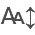

ANIO  IDDPTO  SEXO GRUPEDAD  CANTIDAD
0  2001    2000     2    45-64         1
1  2001    2000     2    >= 75         1
2  2001    2000     1    65-74         1
3  2001    2000     1    65-74         1
4  2001    2000     2    >= 75         1

In [ ]:
# visualizar df
init_notebook_mode(all_interactive=True)
df.head()

In [ ]:
# cambiar valores columna SEXO
sex_map = {1: 'Masculino', 2: 'Femenino', 9: "Otro"}
df['SEXO'] = df['SEXO'].map(sex_map)

In [ ]:
# Agregamos defunciones totales por sexo y por grupo etario
deaths_by_sex = df.groupby('SEXO')['CANTIDAD'].sum().reset_index()
deaths_by_age_group = df.groupby('GRUPEDAD')['CANTIDAD'].sum().reset_index()

In [ ]:
# Ordenamos los grupos etarios
age_order = ['0-4', '5-19', '20-44', '45-64', '65-74', '>= 75', 'sin especificar']
deaths_by_age_group['GRUPEDAD'] = pd.Categorical(deaths_by_age_group['GRUPEDAD'], categories=age_order, ordered=True)
deaths_by_age_group = deaths_by_age_group.sort_values('GRUPEDAD')

Crear gráficos de torta que muestre la distribución de defunciones por sexo, y de barras que presente las defunciones por grupo de edad.

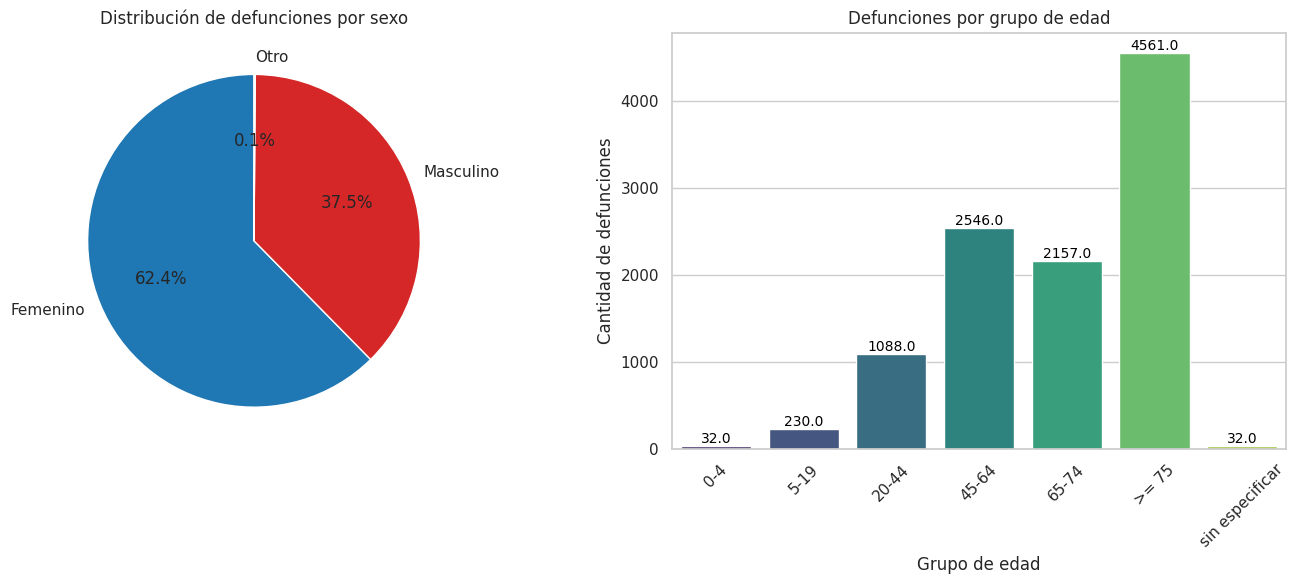

In [ ]:
# Configurar el estilo
sns.set(style="whitegrid")

# Crear la figura
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de torta por sexo
axes[0].pie(
    deaths_by_sex['CANTIDAD'],
    labels=deaths_by_sex['SEXO'],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#1f77b4', '#d62728', "#808080"]
)
axes[0].set_title('Distribución de defunciones por sexo')

# Gráfico de barras por grupo etario
sns.barplot(
    data=deaths_by_age_group,
    x='GRUPEDAD',
    y='CANTIDAD',
    ax=axes[1],
    palette='viridis',
    hue='GRUPEDAD',
    legend=False
)

# Add values above the bars
for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                   textcoords='offset points')
axes[1].set_title('Defunciones por grupo de edad')
axes[1].set_xlabel('Grupo de edad')
axes[1].set_ylabel('Cantidad de defunciones')
axes[1].tick_params(axis='x', rotation=45)

# Ajuste final
plt.tight_layout()
plt.show()

#### Pirámide de edad por sexo de la distribución de mortalidad por asma

In [ ]:
# cargar df
df = pd.read_csv('pdt/mortalidad_asma/data/csv/def_asma_2001_2022_clean_02.csv')


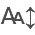

ANIO  IDDPTO  SEXO GRUPEDAD  CANTIDAD
0  2001    2000     2    45-64         1
1  2001    2000     2    >= 75         1
2  2001    2000     1    65-74         1
3  2001    2000     1    65-74         1
4  2001    2000     2    >= 75         1

In [ ]:
# visualizar df
init_notebook_mode(all_interactive=True)
df.head()

In [ ]:
# cambiar valores de la columna SEXO
sex_map = {1: 'Masculino', 2: 'Femenino', 9: "Otro"}
df['SEXO'] = df['SEXO'].map(sex_map)

In [ ]:
# eliminar muestras con SEXO=="Otro"
df = df[df['SEXO'] != 'Otro']


In [ ]:
# Agregar defunciones por grupo de edad y sexo
pyramid_df = df.groupby(['GRUPEDAD', 'SEXO'])['CANTIDAD'].sum().reset_index()

In [ ]:
# Ordenamos los grupos etarios
age_order = ['0-4', '5-19', '20-44', '45-64', '65-74', '>= 75', 'sin especificar']
pyramid_df['GRUPEDAD'] = pd.Categorical(pyramid_df['GRUPEDAD'], categories=age_order, ordered=True)
pyramid_df = pyramid_df.sort_values('GRUPEDAD')

In [ ]:
age_order = ['0-4', '5-19', '20-44', '45-64', '65-74', '>= 75', 'sin especificar']
deaths_by_age_group['GRUPEDAD'] = pd.Categorical(deaths_by_age_group['GRUPEDAD'], categories=age_order, ordered=True)
deaths_by_age_group = deaths_by_age_group.sort_values('GRUPEDAD')

In [ ]:
# Convertir defunciones masculinas a negativas para el gráfico
pyramid_df['CANTIDAD'] = pyramid_df.apply(
    lambda row: -row['CANTIDAD'] if row['SEXO'] == 'Masculino' else row['CANTIDAD'], axis=1
)

Crear gráfico de barras horizontales que muestre la pirámide de edad por sexopara defunciones por asma

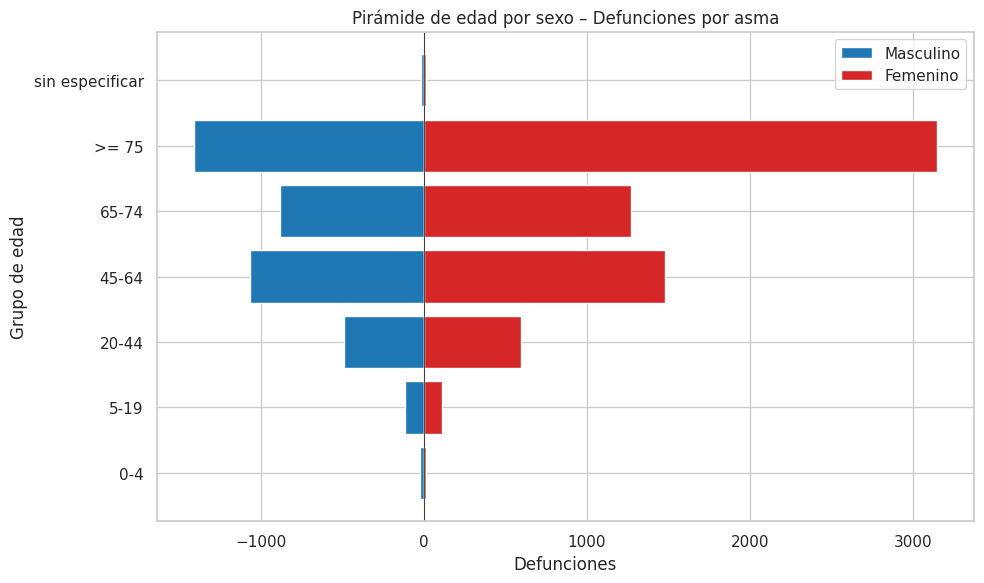

In [ ]:
# Crear gráfico de barras horizontales
plt.figure(figsize=(10, 6))
for sex, color in zip(['Masculino', 'Femenino'], ['#1f77b4', '#d62728']):
    subset = pyramid_df[pyramid_df['SEXO'] == sex]
    plt.barh(subset['GRUPEDAD'], subset['CANTIDAD'], color=color, label=sex)

# Estética del gráfico
plt.axvline(0, color='black', linewidth=0.5)
plt.xlabel('Defunciones')
plt.ylabel('Grupo de edad')
plt.title('Pirámide de edad por sexo – Defunciones por asma')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

### Patrones geoespaciales


El EDA patrones geoespaciales permitirán detectar  variaciones regionales (departamentos) y temporales de la mortalidad por asma.  

#### Mapa de mortalidad por departamento (mapa coroplético).
Crearemos mapas coropléticos en modo *facetmap* con la tasa de mortalidad por asma ajustada a 100.000 habitantes para cada departamento y por año de estudio (2001-2022).

In [ ]:
# cargar shp con datos de poblacion proyectada
gdf = gpd.read_file("pdt/mortalidad_asma/data/shp/tma_2001_2022.shp", encoding='utf-8')


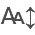

IDPROV          PROV IDDPTO                    DPTO  A_2001  A_2002  A_2003  \
0     06  Buenos Aires  06854              25 de Mayo   34523   34696   34871   
1     06  Buenos Aires  06588              9 de Julio   45514   45794   46079   
2     06  Buenos Aires  06007           Adolfo Alsina   16110   16228   16348   
3     06  Buenos Aires  06014  Adolfo Gonzales Chaves   11941   11965   11989   
4     06  Buenos Aires  06021                 Alberti   10292   10340   10389   

   A_2004  A_2005  A_2006  ...  CA_2018  C_2019  CA_2019  C_2020  CA_2020  \
0   35048   35228   35409  ...     0.00       0     0.00       0      0.0   
1   46366   46657   46951  ...     2.06       1     2.05       0      0.0   
2   16469   16592   16716  ...     0.00       0     0.00       0      0.0   
3   12014   12039   12064  ...     0.00       0     0.00       0      0.0   
4   10438   10488   10539  ...     9.13       2    18.23       0      0.0   

   C_2021  CA_2021  C_2022  CA_2022  \
0       1     2.69       0     0.00   
1       1     2.05       1     2.05   
2       0     0.00       0     0.00   
3       0     0.00       0     0.00   
4       1     9.08       0     0.00   

                                            geometry  
0  POLYGON ((-59.99 -35.12968, -59.98849 -35.1300...  
1  POLYGON ((-60.74141 -35.24375, -60.7155 -35.26...  
2  POLYGON ((-63.2066 -36.67023, -63.16748 -36.70...  
3  POLYGON ((-60.35934 -37.74854, -60.32281 -37.7...  
4  POLYGON ((-60.29131 -34.78621, -60.26013 -34.8...  

[5 rows x 71 columns]

In [ ]:
# visualizar GeoDataFrame (gdf)
init_notebook_mode(all_interactive=True)
gdf.head()

In [ ]:
# ver numero de registros
len(gdf)

511

Usaremos la librería [mapclassify](https://pysal.org/mapclassify/index.html) de [Pysal](https://pysal.org/) para determinar el mejor clasificador para el mapa coroplético.

In [ ]:
# select data using index
selected_data_2001_2022 = gdf.loc[:,["CA_2001", "CA_2002", "CA_2003", "CA_2004", "CA_2005", "CA_2006", "CA_2007", "CA_2008", "CA_2009", "CA_2010",
                                     "CA_2011", "CA_2012", "CA_2013", "CA_2014", "CA_2015", "CA_2016", "CA_2017", "CA_2018", "CA_2019", "CA_2020",
                                     "CA_2021", "CA_2022"]]

In [ ]:
# Quantiles classifier
5 = mapclassify.Quantiles(selected_data_2001_2022, k=5)
q5

/opt/miniconda/lib/python3.12/site-packages/mapclassify/classifiers.py:1653: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 3.
  self.bins = quantile(y, k=k)


Quantiles

    Interval       Count
------------------------
[  0.00,   0.00] |  7313
(  0.00,   1.77] |  1684
(  1.77, 192.31] |  2245

In [ ]:
# EqualInterval classifier
ei5 = mapclassify.EqualInterval(selected_data_2001_2022, k=5)
ei5

EqualInterval

    Interval       Count
------------------------
[  0.00,  38.46] | 11234
( 38.46,  76.92] |     7
( 76.92, 115.39] |     0
(115.39, 153.85] |     0
(153.85, 192.31] |     1

In [ ]:
# HeadTailBreaks classifier
ht = mapclassify.HeadTailBreaks(selected_data_2001_2022)
ht

HeadTailBreaks

    Interval       Count
------------------------
[  0.00,   1.19] |  8338
(  1.19,   4.33] |  2015
(  4.33,   8.78] |   612
(  8.78,  14.84] |   209
( 14.84,  26.58] |    51
( 26.58,  48.96] |    13
( 48.96,  94.30] |     3
( 94.30, 192.31] |     1

In [ ]:
mb5 = mapclassify.MaximumBreaks(selected_data_2001_2022, k=5)
mb5

MaximumBreaks

    Interval       Count
------------------------
[  0.00,  42.57] | 11236
( 42.57,  51.80] |     2
( 51.80,  64.31] |     2
( 64.31, 131.72] |     1
(131.72, 192.31] |     1

In [ ]:
# StdMean classifier
msd = mapclassify.StdMean(selected_data_2001_2022)
msd

StdMean

    Interval       Count
------------------------
(  -inf,  -5.63] |     0
( -5.63,  -2.22] |     0
( -2.22,   4.60] | 10415
(  4.60,   8.00] |   498
(  8.00, 192.31] |   329

In [ ]:
# FisherJenks classifier
fj5 = mapclassify.FisherJenks(selected_data_2001_2022, k=5)
fj5

FisherJenks

    Interval       Count
------------------------
[  0.00,   1.99] |  9185
(  1.99,   7.38] |  1680
(  7.38,  21.57] |   351
( 21.57,  71.12] |    25
( 71.12, 192.31] |     1

Visualizar el  ACDM (mean Absolute Deviation Around the class Median). En Pysal ACDM  se refiere a la desviación absoluta media alrededor de la mediana de la clase. Es una medida del grado de ajuste de un clasificador a los datos, específicamente mediante la evaluación de la distancia promedio entre cada punto de datos y el valor de la mediana de la clase asignada.

/tmp/ipykernel_9/3992453259.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


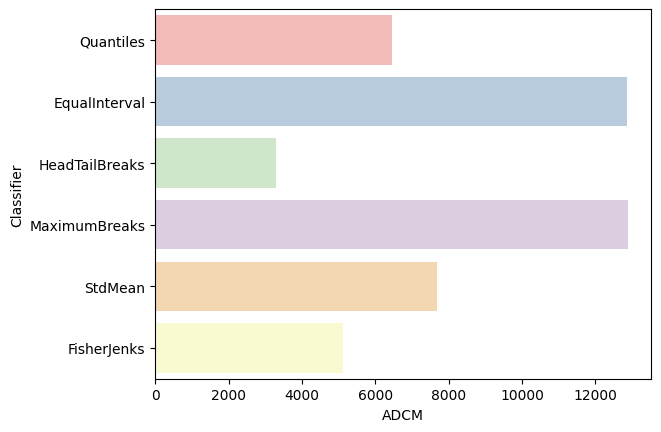

In [ ]:
# Bunch classifier objects
class5 = q5, ei5, ht, mb5, msd, fj5
# Collect ADCM for each classifier
fits = np.array([c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms["classifier"] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ["ADCM", "Classifier"]
ax = sns.barplot(
    y="Classifier", x="ADCM", data=adcms, palette="Pastel1"
)

Dos clasificadores tiene el ACDM  más bajo, FisherJenks y HeadTailBreaks. Seleccionaremos a FisherJenks como clasificador para crear los mapas  coropléticos.

In [ ]:
# visualizar los bins
bins = fj5.bins.tolist()
bins

[1.99, 7.38, 21.57, 71.12, 192.31]

In [ ]:
# insert 0 at 0 position
bins.insert(0, 0.0)
bins

[0.0, 1.99, 7.38, 21.57, 71.12, 192.31]

In [ ]:
# round and transform to integer
bins = [int(round(num, 0)) for num in bins]
# fix last value
bins[-1]=193
bins

[0, 2, 7, 22, 71, 193]

Crearemos una función para crear un esquema de clasicación personalizado basado en FisherJenks

In [ ]:
def maptma(colname, title, row, col):
    # Create a custom classification using UserDefined
    classification = mapclassify.UserDefined(gdf[colname], bins)

    classification.plot(
        gdf,
        legend=True,
        legend_kwds={
            "fmt": "{:.0f}",
            "loc": "upper right",
            "bbox_to_anchor": (1.1, 0.4),
            "fontsize": 8,
            "labels": ["0", "0-2", "2-7", "7-22", "22-71", "71-193"],  # Use the custom legend labels
        },
        axis_on=False,
        border_color='black',
        cmap="viridis_r",
        ax=axes[row, col] # Specify the subplot
    )

    # Set the title for the current axis
    axes[row, col].set_title(title)

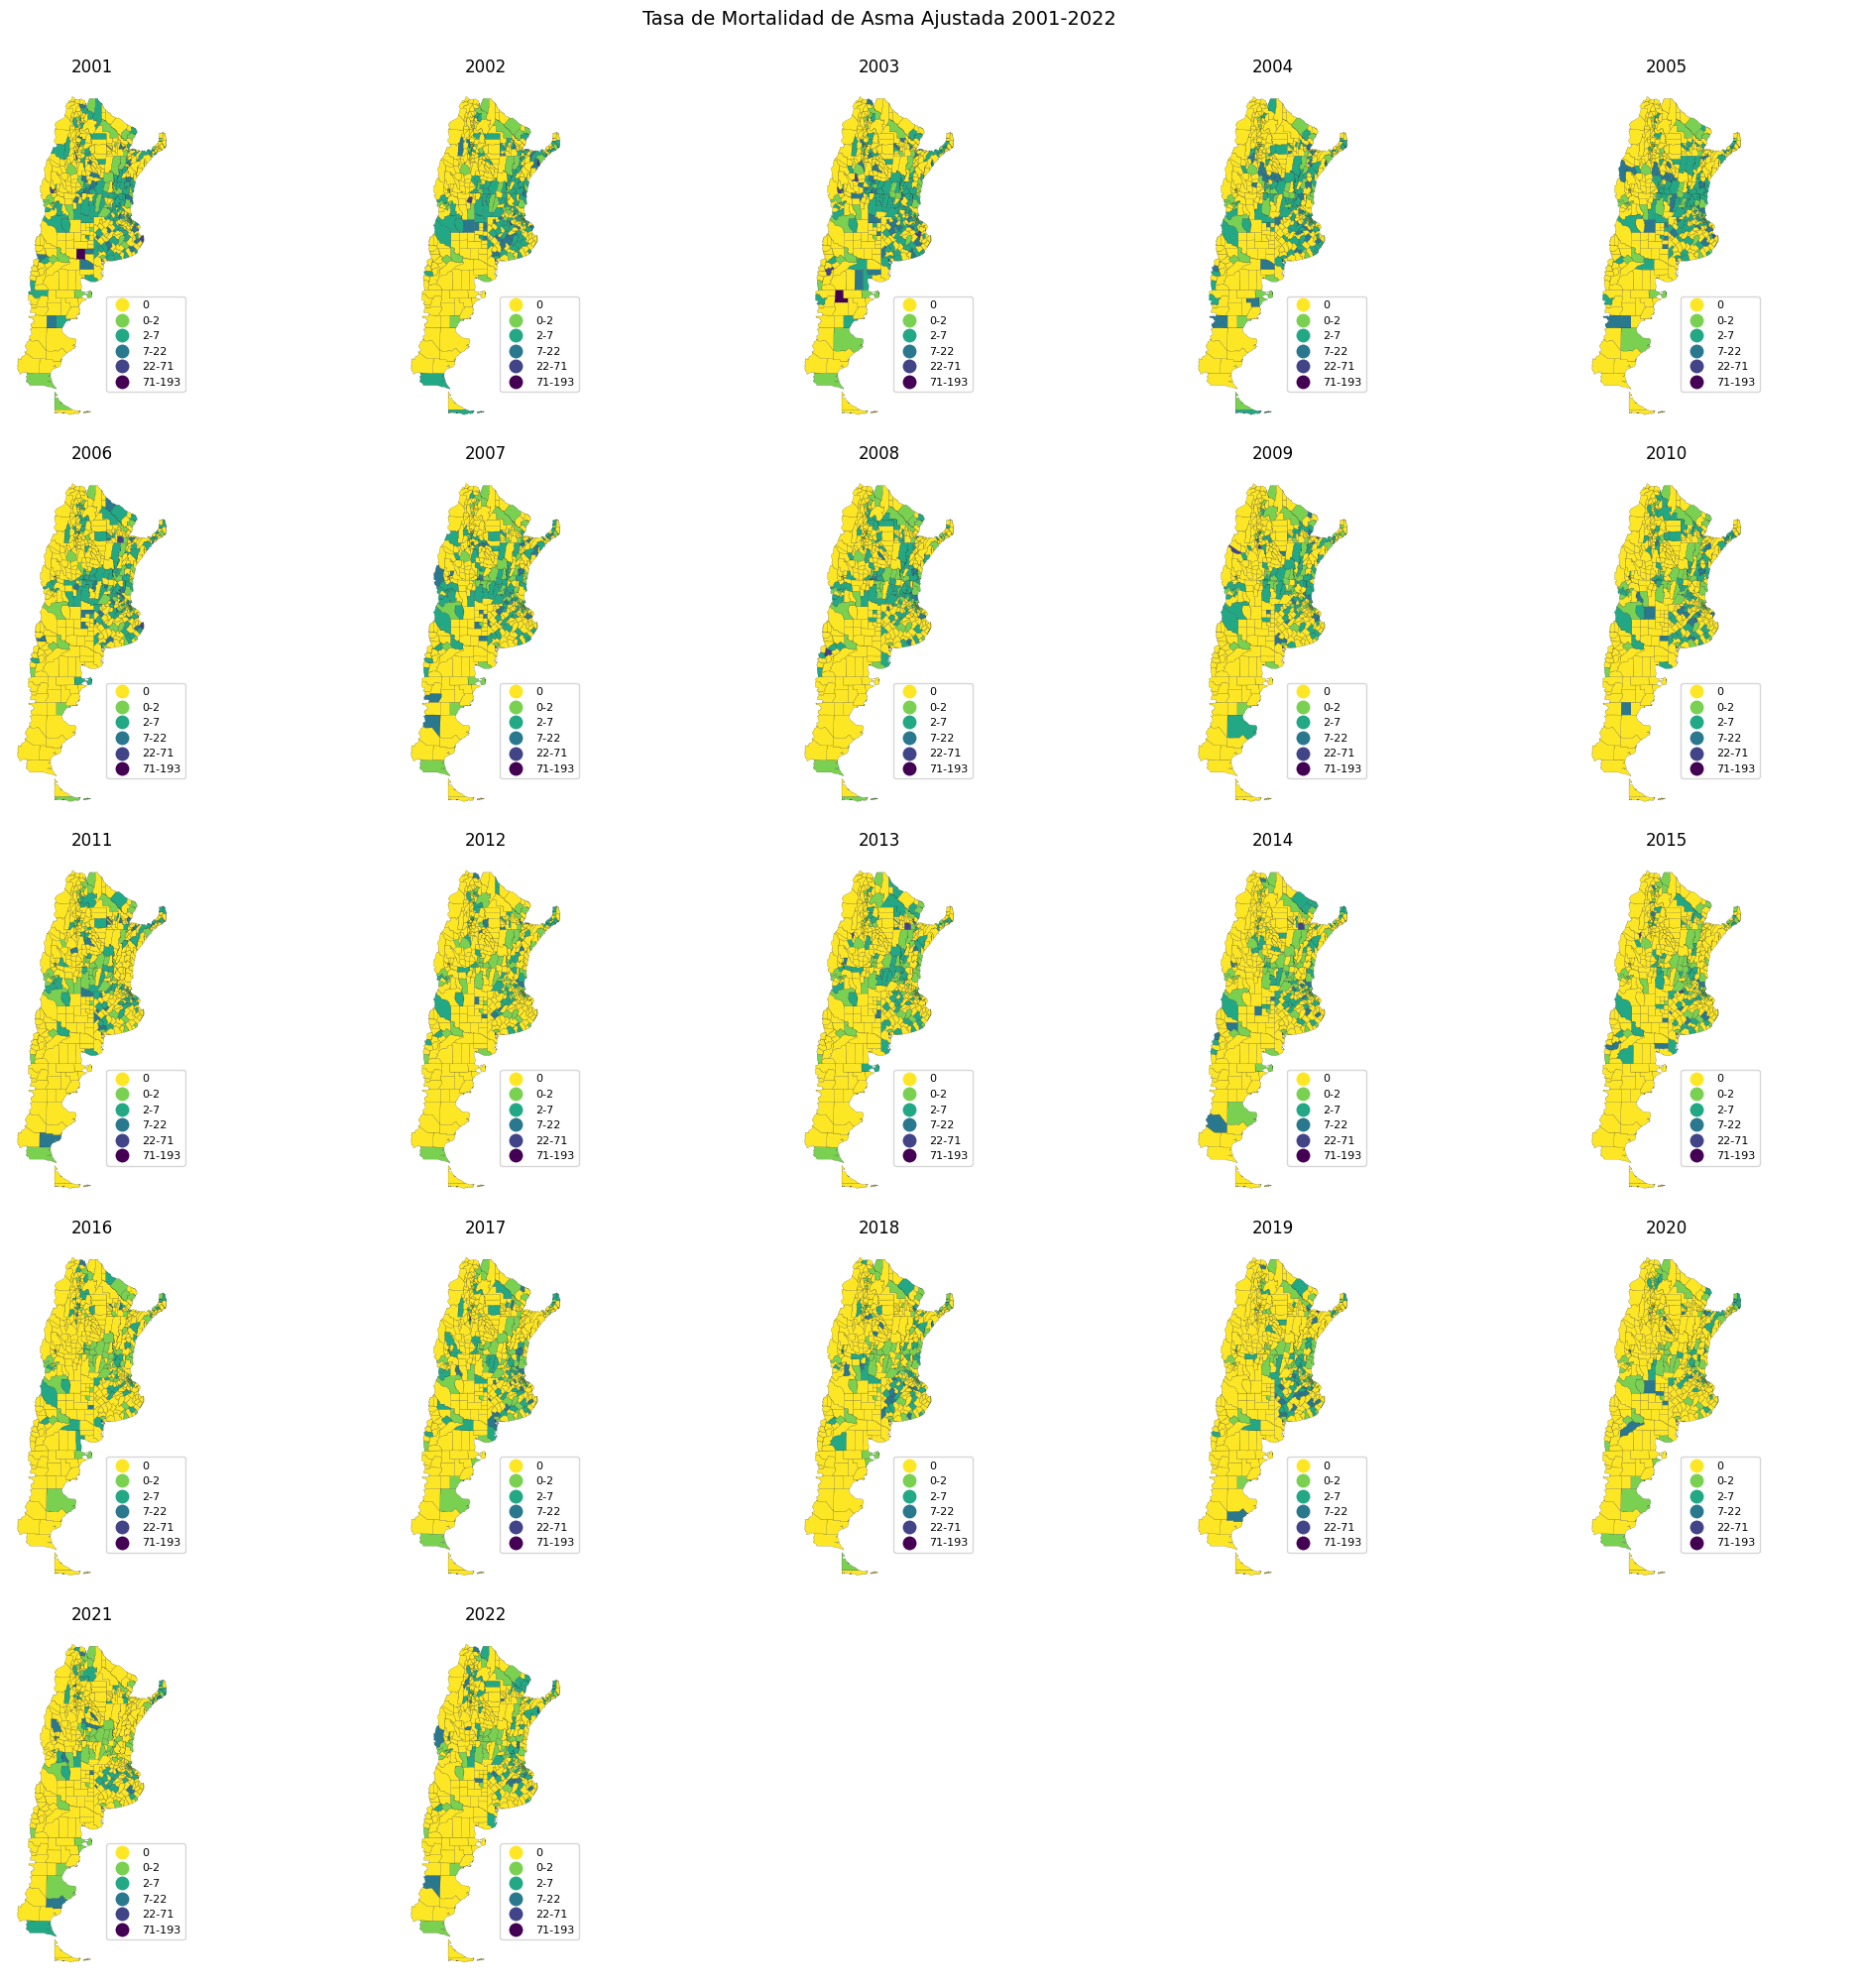

In [ ]:
# create a gridmap 5 columns 1 rows
fig, axes = plt.subplots(5, 5, figsize=(20, 20)) # 4 row, 5 columns
plt.suptitle('Tasa de Mortalidad de Asma Ajustada 2001-2022', fontsize=14, y=1)

# row 0
maptma("CA_2001", "2001", 0, 0)
maptma("CA_2002", "2002", 0, 1)
maptma("CA_2003", "2003", 0, 2)
maptma("CA_2004", "2004", 0, 3)
maptma("CA_2005", "2005", 0, 4)

# row 1
maptma("CA_2006", "2006", 1, 0)
maptma("CA_2007", "2007", 1, 1)
maptma("CA_2008", "2008", 1, 2)
maptma("CA_2009", "2009", 1, 3)
maptma("CA_2010", "2010", 1, 4)

# row 2
maptma("CA_2011", "2011", 2, 0)
maptma("CA_2012", "2012", 2, 1)
maptma("CA_2013", "2013", 2, 2)
maptma("CA_2014", "2014", 2, 3)
maptma("CA_2015", "2015", 2, 4)

# row 3
maptma("CA_2016", "2016", 3, 0)
maptma("CA_2017", "2017", 3, 1)
maptma("CA_2018", "2018", 3, 2)
maptma("CA_2019", "2019", 3, 3)
maptma("CA_2020", "2020", 3, 4)

# row 4
maptma("CA_2021", "2021", 4, 0)
maptma("CA_2022", "2022", 4, 1)

axes[4,2].axis('off')
axes[4,3].axis('off')
axes[4,4].axis('off')

plt.tight_layout()
plt.show();

Crear un GIF animado que muestre la tasa de mortalidad por año.

In [ ]:
# funcion para crear una imágen para cada año
def plot_map_for_gif(colname, year, bins, gdf, output_folder="pdt/mortalidad_asma/data/images/gif"):
    fig, ax = plt.subplots(figsize=(4, 4))

    classification = mapclassify.UserDefined(gdf[colname], bins)

    classification.plot(
        gdf,
        legend=True,
        legend_kwds={
            "fmt": "{:.0f}",
            "loc": "upper right",
            "bbox_to_anchor": (1.1, 0.4),
            "fontsize": 8,
            "labels": ["0", "0-2", "2-7", "7-22", "22-71", "71-193"]
        },
        axis_on=False,
        border_color='black',
        cmap="viridis_r",
        ax=ax
    )

    ax.set_title(f"Tasa de Mortalidad de Asma Ajustada - {year}", fontsize=12)
    ax.axis('off')

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    filepath = os.path.join(output_folder, f"asma_{year}.png")
    plt.savefig(filepath, bbox_inches="tight", dpi=150)
    plt.close()

In [ ]:
# Define the bins and list of years
bins = [0, 2, 7, 22, 71, 193]
years = list(range(2001, 2023))  # 2001 to 2022

for year in years:
    colname = f"CA_{year}"
    plot_map_for_gif(colname, year, bins, gdf)


In [ ]:
# funcion para crear el GIF animado a partir de cada imagen
def create_gif_from_maps(image_folder="pdt/mortalidad_asma/data/images/gif", gif_name="pdt/mortalidad_asma/data/images/gif/asma_mortalidad.gif"):
    images = []
    for year in range(2001, 2023):
        filename = f"asma_{year}.png"
        filepath = os.path.join(image_folder, filename)
        images.append(imageio.imread(filepath))

    imageio.mimsave(gif_name, images, fps=1)


In [ ]:
create_gif_from_maps()

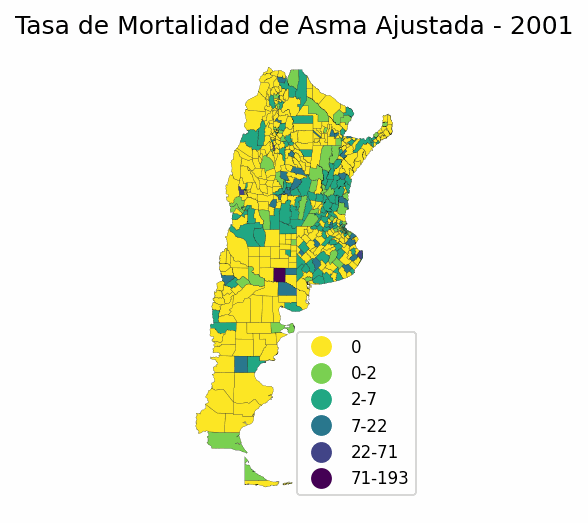

In [ ]:
# visualizar el GIG animado
Image(filename="pdt/mortalidad_asma/data/images/gif/asma_mortalidad.gif")

#### Departamentos con mortalidad persistente (> 0) entre 2001-2022

In [ ]:
# cargar shp con datos de poblacion proyectada
gdf = gpd.read_file("pdt/mortalidad_asma/data/shp/tma_2001_2022.shp", encoding='utf-8')